## Machine Learning for Predicting Airline Customer Satisfaction

### Introduction

Customer experience is a very important concern for airline industries as dissatisfied customers translate to less revenue for these industries.
Airlines can utilize customer feedback surveys to discover customers' perceptions of the services they offer. Through Data Analysis, airlines can derive valuable insights from customer feedback, make informed business decisions to meet customers’ expectations and attract new customers while retaining existing ones.
Machine learning can be used to predict customer satisfaction when a service is provided. 
The aim of this project is to build a machine learning model to predict customer satisfaction. We will also use the LIME explainability technique to understand the contribution of each feature in our prediction.


### Dataset

The Dataset for this project is from [kaggle](https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction). The data is from an airline organization whose actual name is not given for various reasons, that's why the airline was given the pseudonym Invistico airlines.
The dataset consists of (23 columns and 129880 entries) details of customers who have already flown with them. The feedback of the customers on various contexts and their flight data has been consolidated.
The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.
Also the airlines need to know which aspects of the services offered by them have to be emphasized more to generate more satisfied customers.


### Data Exploration and Analysis

We explored the details of the customers surveyed in this dataset to have an understanding of their unique features and any salient aspects that affected customer flight satisfaction.
Our participants were a relatively young group overall with participants ranging from 7 to 85 years and an average age of approximately 39 years.


#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

#### Read Data

In [2]:
df = pd.read_csv('Invistico_Airline.csv')

#### Explore Data

In [3]:
df.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

There are 393 null values in the Arrival Delay in Minutes column

#### Feature Correlation

<AxesSubplot:>

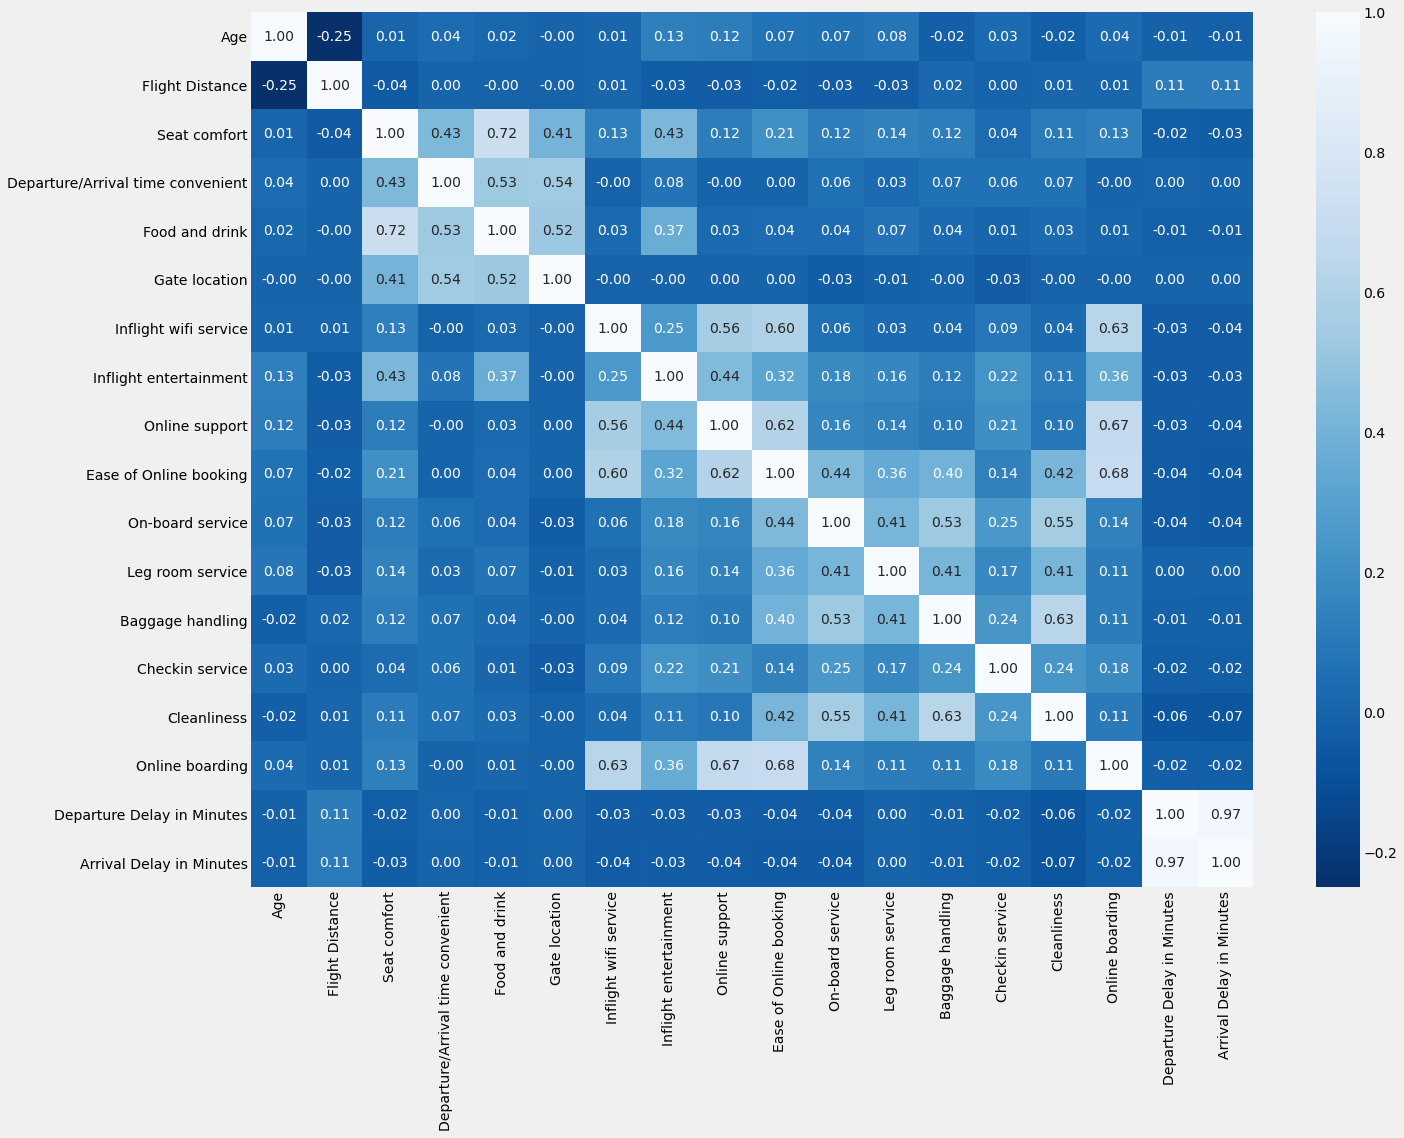

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True, fmt='.2f')

Food and drink feature has a strong correlation of ~0.72 with seat comfort feature and a correlation of ~0.5 with Departure/Arrival time convenient and Gate location

Food and drink has a correlation of ~0.5 with Departure/Arrival time convenient

Gate location has a correlation of ~0.5 with Departure/Arrival time convenient and Food and drink

Inflight wifi service has a correlation of ~0.5 with Online support and a correlation of ~0.6 with Ease of Online booking

Online support has a corrrelation of ~0.55 with Inflight wifi service and a correlation of ~0.6 with Ease of Online booking and Online boarding

Ease of Online booking has a correlation of ~0.6 with Inflight wifi service and Online boarding

On-board service has a correlation of ~0.5 with Baggage handling

Cleanliness has a correlation of ~0.55 with On-board service and a correlation of ~0.6 with Baggage handling

Departure Delay in Minutes has a high correlation of ~0.96 with Arrival Delay in Minutes

The highest direct correlation with satisfaction in customers was the presence of the inflight entertainment (0.52).

#### Visualizing each feature with target feature, satisfaction

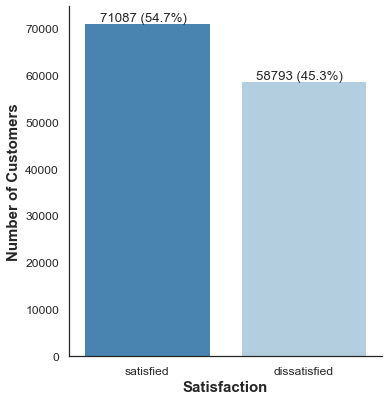

In [7]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(5,6))
ax = sns.countplot(data=df, x='satisfaction', palette='Blues_r')
#ax.set_xticklabels(['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)',(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Satisfaction', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

We had more satisfied fliers than otherwise, with 54.7% of the surveyed customers reporting satisfaction with their experiences

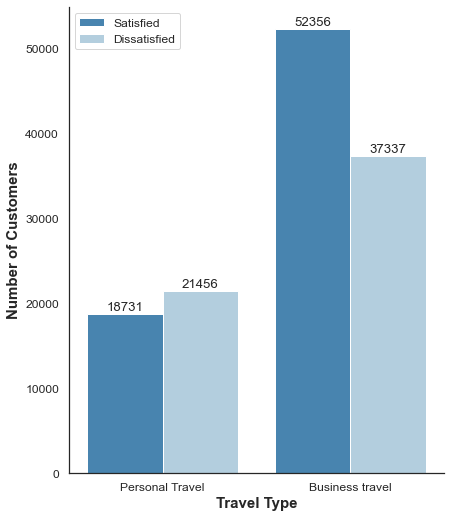

In [8]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df, x='Type of Travel', palette='Blues_r', hue='satisfaction')
#ax.set_xticklabels(['Business travel','Personal travel'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Travel Type', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

Most of the customers travelled for business rather than personal reasons and satisfaction was proportionately higher in business travelers as more individuals that travelled for personal reasons had unsatisfactory experiences than otherwise.

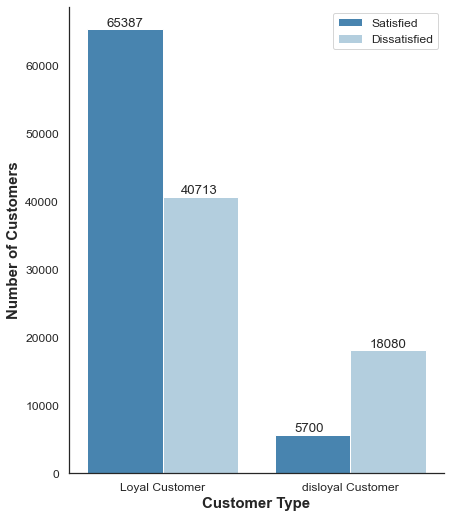

In [9]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df, x='Customer Type', palette='Blues_r', hue='satisfaction')
#ax.set_xticklabels(['Disloyal Customer','Loyal Customer'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Customer Type', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

Out of  106,100 Loyal Customers, 65,387 were satistied and 40,713 dissatisfied.  
Out of 23,780 disloyal Customers, 5,700 were satisfied and 18,080 dissatisfied.

Overall, loyal customers were more satisfied than disloyal customers

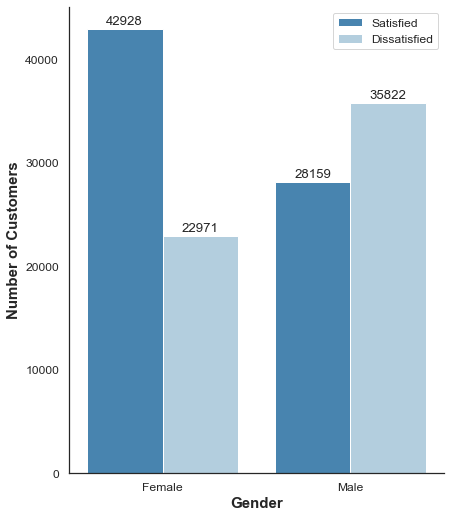

In [10]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df, x='Gender', palette='Blues_r', hue='satisfaction')
#ax.set_xticklabels(['Male','Female'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Gender', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

There were more female travelers than males in our participant sample and more female fliers reported satisfaction with their experiences while a higher proportion of the male participants had unsatisfactory experiences.

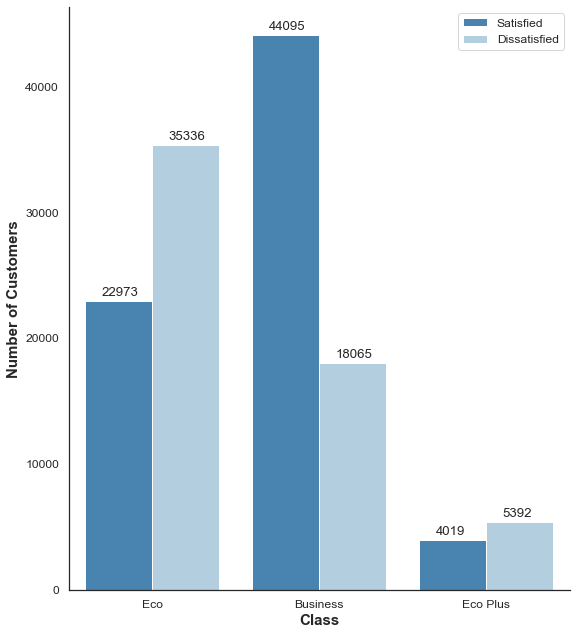

In [11]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(8,10))
ax = sns.countplot(data=df, x='Class', palette='Blues_r', hue='satisfaction')
#ax.set_xticklabels(['Business','Eco Plus', 'Eco'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Class', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

In terms of flight seat classes, the business class seats were the only category of the three with a higher proportion of satisfied customers than otherwise. This could point to a better experience overall in those class of seats or certain deficiencies in the Eco and Eco plus seats.

### Data Preproprocessing and Feature Engineering

In [12]:
#drop rows with missing values
df.dropna(inplace=True)

In [13]:
#Create new column: total delay
df['total_delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [14]:
#drop 'Departure Delay in Minutes',and 'Arrival Delay in Minutes'
df.drop(columns=['Departure Delay in Minutes','Arrival Delay in Minutes'], inplace=True)

##### Convert Categorial features to numeric

In [15]:
#satisfied and dissatisfied in number 
satisfaction_map = {"satisfied": 1,"dissatisfied": 0 }
df['satisfaction']  = df['satisfaction'].map(satisfaction_map)

#Male and Female in number 
Gender_map = {"Male": 1,"Female": 2 }
df['Gender']  = df['Gender'].map(Gender_map)

#Loyal and disloyal in number 
Customer_Type_map = {"Loyal Customer": 1,"disloyal Customer": 0 }
df['Customer Type']  = df['Customer Type'].map(Customer_Type_map)

#Business travel and Business travel in number 
Type_of_Travel_map = {"Business travel": 1,"Personal Travel": 2 }
df['Type of Travel']  = df['Type of Travel'].map(Type_of_Travel_map)

#Business and Eco and Eco plus in number 
Class_map = {"Business": 1,"Eco": 3, "Eco Plus": 2 }
df['Class']  = df['Class'].map(Class_map)

##### Check for and Remove Outliers
We will remove outliers from columns with outliers

In [16]:
df.describe()

satisfaction         Gender  Customer Type            Age  \
count  129487.000000  129487.000000  129487.000000  129487.000000   
mean        0.547406       1.507410       0.816862      39.428761   
std         0.497749       0.499947       0.386781      15.117597   
min         0.000000       1.000000       0.000000       7.000000   
25%         0.000000       1.000000       1.000000      27.000000   
50%         1.000000       2.000000       1.000000      40.000000   
75%         1.000000       2.000000       1.000000      51.000000   
max         1.000000       2.000000       1.000000      85.000000   

       Type of Travel          Class  Flight Distance   Seat comfort  \
count   129487.000000  129487.000000    129487.000000  129487.000000   
mean         1.309236       1.970090      1981.008974       2.838586   
std          0.462180       0.962638      1026.884131       1.392873   
min          1.000000       1.000000        50.000000       0.000000   
25%          1.000000       1.000000      1359.000000       2.000000   
50%          1.000000       2.000000      1924.000000       3.000000   
75%          2.000000       3.000000      2543.000000       4.000000   
max          2.000000       3.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  ...  \
count                      129487.000000   129487.000000  ...   
mean                            2.990277        2.852024  ...   
std                             1.527183        1.443587  ...   
min                             0.000000        0.000000  ...   
25%                             2.000000        2.000000  ...   
50%                             3.000000        3.000000  ...   
75%                             4.000000        4.000000  ...   
max                             5.000000        5.000000  ...   

       Inflight entertainment  Online support  Ease of Online booking  \
count           129487.000000   129487.000000           129487.000000   
mean                 3.383745        3.519967                3.472171   
std                  1.345959        1.306326                1.305573   
min                  0.000000        0.000000                0.000000   
25%                  2.000000        3.000000                2.000000   
50%                  4.000000        4.000000                4.000000   
75%                  4.000000        5.000000                5.000000   
max                  5.000000        5.000000                5.000000   

       On-board service  Leg room service  Baggage handling  Checkin service  \
count     129487.000000     129487.000000     129487.000000    129487.000000   
mean           3.465143          3.486118          3.695460         3.340729   
std            1.270755          1.292079          1.156487         1.260561   
min            0.000000          0.000000          1.000000         0.000000   
25%            3.000000          2.000000          3.000000         3.000000   
50%            4.000000          4.000000          4.000000         3.000000   
75%            4.000000          5.000000          5.000000         4.000000   
max            5.000000          5.000000          5.000000         5.000000   

         Cleanliness  Online boarding    total_delay  
count  129487.000000    129487.000000  129487.000000  
mean        3.705886         3.352545      29.734514  
std         1.151683         1.298624      75.732722  
min         0.000000         0.000000       0.000000  
25%         3.000000         2.000000       0.000000  
50%         4.000000         4.000000       2.000000  
75%         5.000000         4.000000      24.000000  
max         5.000000         5.000000    3176.000000  

[8 rows x 22 columns]

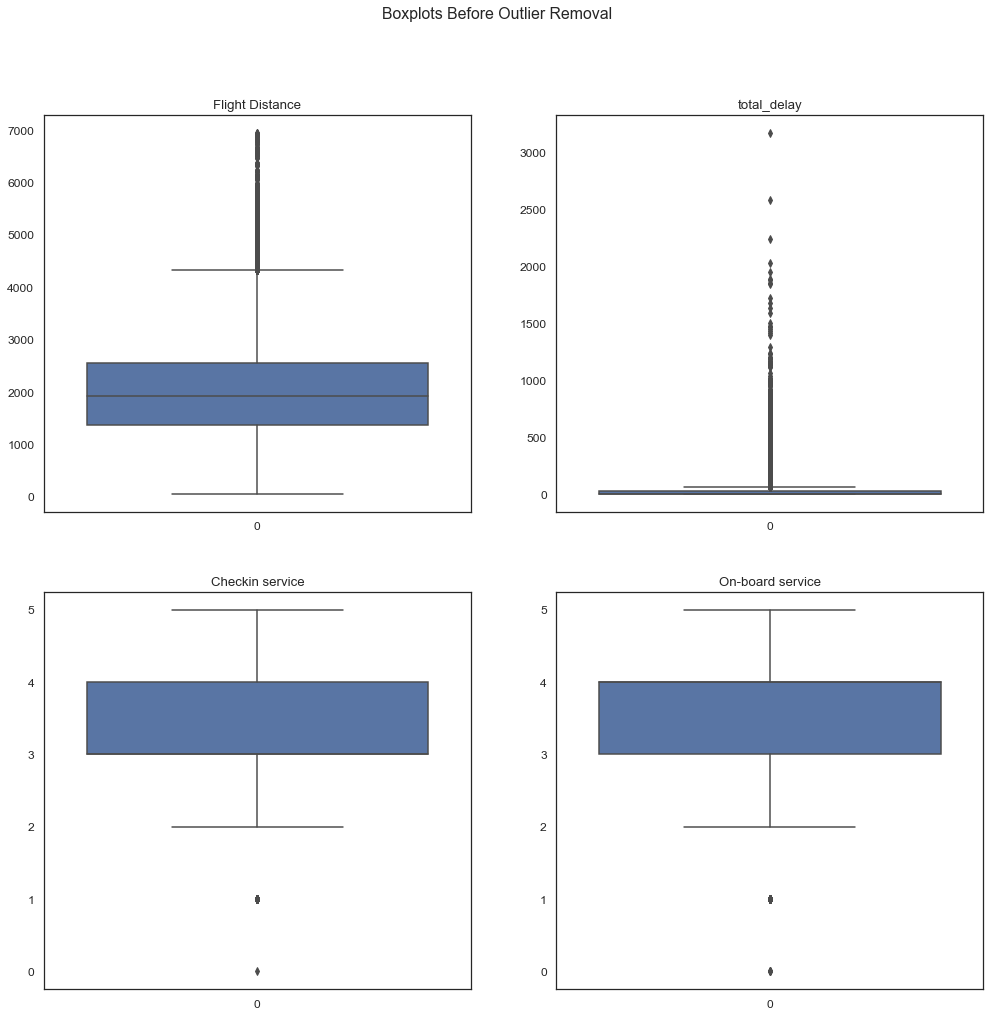

In [17]:
df_outliers = df
c = ['Flight Distance', 'total_delay', 'Checkin service', 'On-board service']

plt.figure(figsize=(15, 15))

for i, column in enumerate(c):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.suptitle("Boxplots Before Outlier Removal")
plt.show()

In [18]:
## Remove Outliers
cols = ['Flight Distance', 'total_delay', 'Checkin service', 'On-board service']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

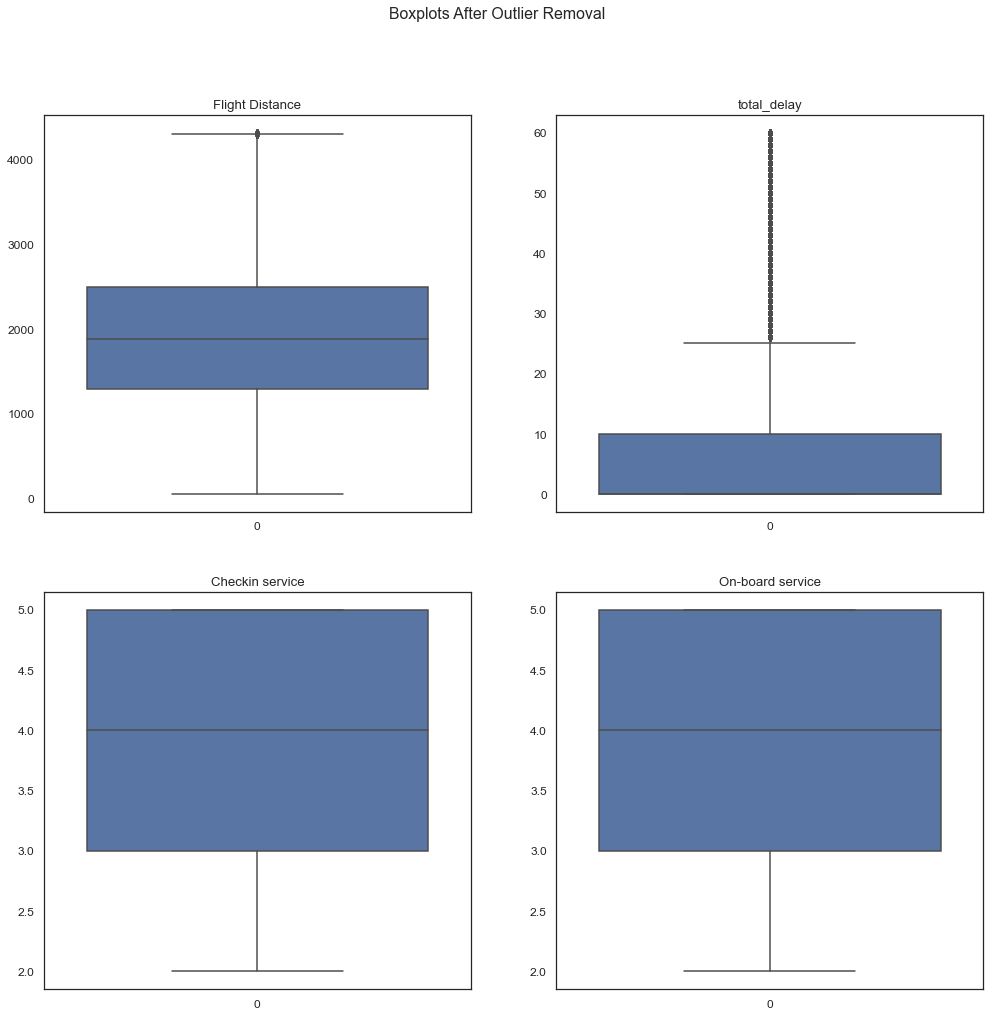

In [19]:
df_outliers = df
c = ['Flight Distance', 'total_delay', 'Checkin service', 'On-board service']

plt.figure(figsize=(15, 15))

for i, column in enumerate(c):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.suptitle("Boxplots After Outlier Removal")
plt.show()

#### Save processed data

In [42]:
df.to_csv(r'../data/processed\df.csv', index = False)

##### Split Data

In [20]:
X = df.drop('satisfaction',axis=1)
y = df['satisfaction']

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 111)

### Modelling

#### Train model

In [22]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(221)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
keras_model = Sequential()
keras_model.add(Dense(100, activation='relu', input_dim=21))
keras_model.add(BatchNormalization())
keras_model.add(Dense(40, activation='relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(1, activation='sigmoid'))

keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1936/1936 [==============================] - 7s 2ms/step - loss: 0.4231 - accuracy: 0.8142
Epoch 2/30
1936/1936 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8374
Epoch 3/30
1936/1936 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8414
Epoch 4/30
1936/1936 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8502
Epoch 5/30
1936/1936 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8548
Epoch 6/30
1936/1936 [==============================] - 4s 2ms/step - loss: 0.3258 - accuracy: 0.8608
Epoch 7/30
1936/1936 [==============================] - 3s 1ms/step - loss: 0.3195 - accuracy: 0.8626
Epoch 8/30
1936/1936 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8661
Epoch 9/30
1936/1936 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.8716
Epoch 10/30
1936/1936 [==============================] - 3s 2ms/step - loss: 0.296

##### Evaluate Model

In [23]:
eval_results = keras_model.evaluate(X_test,y_test, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.2108 91.17%


In [24]:
prediction_keras = np.around(keras_model.predict(X_test))

# Test score
score_keras = keras_model.evaluate(X_test, y_test)
print('test accuracy:')
print(score_keras)
print('train accuracy:')
print(keras_model.evaluate(X_train, y_train))

print(classification_report(y_test,prediction_keras))

830/830 [==============================] - 1s 983us/step - loss: 0.2108 - accuracy: 0.9117
test accuracy:
[0.21080373227596283, 0.9116660952568054]
train accuracy:
1936/1936 [==============================] - 2s 922us/step - loss: 0.2123 - accuracy: 0.9093
[0.2122953236103058, 0.9092538356781006]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10134
           1       0.95      0.91      0.93     16413

    accuracy                           0.91     26547
   macro avg       0.90      0.91      0.91     26547
weighted avg       0.91      0.91      0.91     26547



#### Save Model

In [38]:
keras_model.save('../models/keras_model.h5')

### Model Explainability with LIME

Model explainability is the process of explaining and interpreting machine learning and deep learning models. It helps to better understand and interpret the model’s behavior and to identify what features the model considers most important. For this project, we used LIME to explain our model.
LIME is an acronym for Local Interpretable Model-agnostic Explanations. It is used to explain predictions of your machine learning model. The process is described below:

##### Install LIME

In [25]:
pip install lime

##### Get predictions

In [26]:
def prob(df):
    print(df.shape)
    y_pred=keras_model.predict(df).reshape(-1, 1)
    #y_pred =(y_pred>0.5)
    print(np.array(list(zip(1-y_pred.reshape(df.shape[0]),y_pred.reshape(df.shape[0])))))
    return np.hstack((1-y_pred,y_pred))

##### Indicate Categorical Features

In [29]:
feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'total_delay']

In [30]:
categorical_names = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding' ]
categorical_features = [0, 1, 3, 4,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

##### Import necessary Libraries

In [31]:
import lime
import lime.lime_tabular

##### Create the explainer

In [32]:
explainer = lime.lime_tabular.LimeTabularExplainer(X[list(X.columns)].astype(int).values,  
mode='classification',training_labels=df['satisfaction'],feature_names=list(X.columns), class_names=['Dissatisfied', 'Satisfied'], categorical_features=categorical_features, categorical_names=categorical_names)

##### Explain an instance

In [33]:
i = 19
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

(5000, 21)
[[4.7683716e-07 9.9999952e-01]
 [7.6015198e-01 2.3984802e-01]
 [7.0821804e-01 2.9178196e-01]
 ...
 [8.1089973e-02 9.1891003e-01]
 [9.7271460e-01 2.7285397e-02]
 [2.7675283e-01 7.2324717e-01]]


##### Show explanation in notebook

In [34]:
exp.show_in_notebook(show_table=True, show_all=False)

The row we are explaining is displayed on the right side, in a table format with 2 columns: Feature and Values. Only the features used in the explanation (in this case, the 10 most important features) are displayed. The value column displays the original value for each feature at that instance. The explanations are based not only on features, but on feature-value pairs. For example, we are saying that Customer Type=1 is indicative of a satisfied Customer (Recall that in our EDA, Loyal Customers(customer type 1) were more satisfied than customer type 2(disloyal customers)). 
Attributes in orange support satisfied customers and those in blue support Dissatisfied Customers. Flight Distance > 2497 supports Dissatisfied Customers, that is, it has a negative impact towards predicting the instance as 'satisfied'. Float point numbers on the horizontal bars represent the relative importance of each feature. This is represented in the chart below:


##### Generate a bar chart of feature contribution for this instance

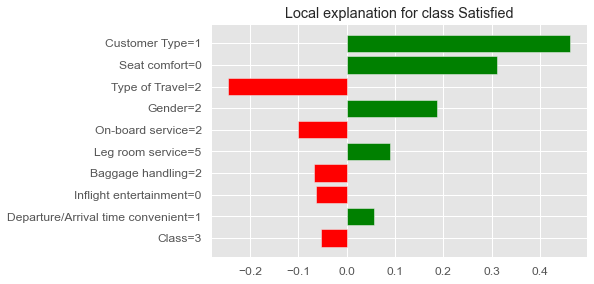

In [35]:
import matplotlib.pyplot as plt

with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [36]:
i = 13
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True)

(5000, 21)
[[4.4405460e-04 9.9955595e-01]
 [5.4366159e-01 4.5633838e-01]
 [2.2020745e-01 7.7979255e-01]
 ...
 [1.9252300e-04 9.9980748e-01]
 [5.1122695e-01 4.8877305e-01]
 [4.1515237e-01 5.8484763e-01]]


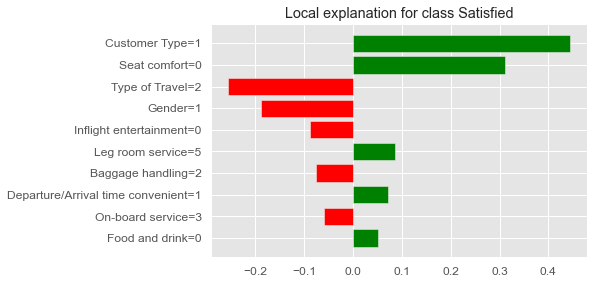

In [37]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [38]:
i = 16
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True)

(5000, 21)
[[3.5762787e-07 9.9999964e-01]
 [9.8418117e-01 1.5818834e-02]
 [5.6867790e-01 4.3132210e-01]
 ...
 [3.1693065e-01 6.8306935e-01]
 [3.7093878e-02 9.6290612e-01]
 [7.0965970e-01 2.9034030e-01]]


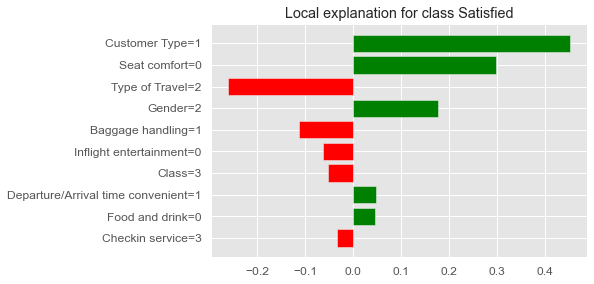

In [39]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [40]:
i = 10001
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True)

(5000, 21)
[[2.2245574e-01 7.7754426e-01]
 [6.6446602e-02 9.3355340e-01]
 [9.5564580e-01 4.4354171e-02]
 ...
 [5.0341237e-01 4.9658766e-01]
 [3.4809113e-04 9.9965191e-01]
 [2.9879785e-01 7.0120215e-01]]


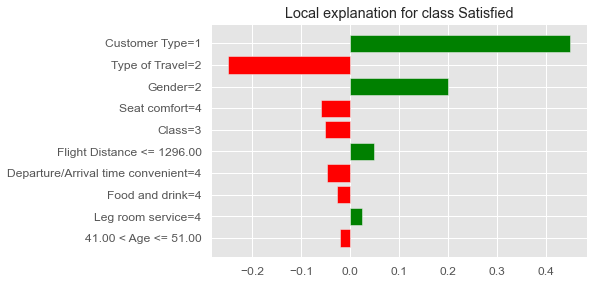

In [41]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

In [42]:
i = 567
exp = explainer.explain_instance(X.loc[i,X.columns].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True, show_all=False)

(5000, 21)
[[2.7286971e-01 7.2713029e-01]
 [2.6484638e-01 7.3515362e-01]
 [6.4539909e-04 9.9935460e-01]
 ...
 [4.2552173e-01 5.7447827e-01]
 [7.1340930e-01 2.8659070e-01]
 [9.5622718e-01 4.3772846e-02]]


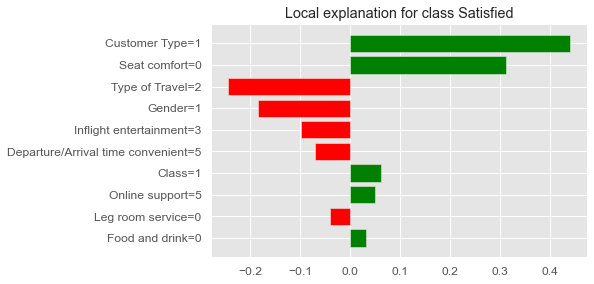

In [43]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

###### From the above explained instances, we see that the most important features are: Customer Type, Type of Travel, Gender, seat comfort, and Departure/Arrival Time Convenient 